## Testing Regulatory Category hypothesis:
### Do medicines in the same regulatory category tend to share more active ingredients?



#### Assortativity
Assortativity is a measure that indicates the tendency of nodes in a network to share similar characteristics. In the context of graphs, assortativity can be analyzed in relation to the attributes of the nodes, such as the regulatory category of medicines. If assortativity is high, it means that similar nodes tend to connect with each other, while low assortativity indicates that different nodes connect more frequently. This concept is crucial for understanding interactions in complex networks, such as that of medicines, where shared characteristics can impact the efficacy and safety of prescriptions.

####Importing Dependencies

In [2]:
# prompt: using networkx and nxviz, access the .csv on files and create a graph of the medicamentos (nodes) where edges between two nodes will exist if they share the same principio ativo

!pip install networkx
!pip install nxviz

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nxviz import circos

/usr/local/lib/python3.10/dist-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


#### Drawing graphs

**Trying to draw the complete database graph with REGISTRATION STATUS different of EXPIRED/CANCELED**


Assortatividade com base na categoria regulatória: 0.36022898461592506


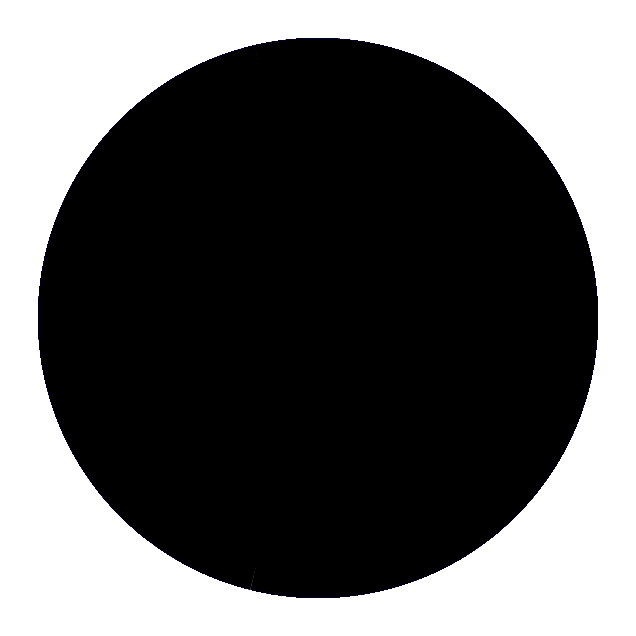

In [5]:
# Ler apenas as colunas necessárias do CSV
df = pd.read_csv('medicamentos.csv',
                 encoding='Windows-1252',
                 delimiter=';',
                 usecols=['NOME_PRODUTO', 'CATEGORIA_REGULATORIA', 'PRINCIPIO_ATIVO'])

# Filtrar os medicamentos onde PRINCIPIO_ATIVO não é nulo ou vazio
df_filtrado = df.dropna(subset=['PRINCIPIO_ATIVO'])

# df_amostra = df_filtrado.sample(n=1000, random_state=1)
df_amostra = df_filtrado
# Criar um grafo vazio
graph = nx.Graph()

# Criar um dicionário para mapear princípios ativos aos medicamentos
principio_ativo_medicamentos = {}

# Preencher o dicionário separando os princípios ativos e mapeando para medicamentos
for idx, row in df_amostra.iterrows():
    principios = [p.strip() for p in row['PRINCIPIO_ATIVO'].split('+')]  # Separar os princípios ativos
    medicamento = row['NOME_PRODUTO']
    categoria_regulatoria = row['CATEGORIA_REGULATORIA']

    # Adicionar nós com atributo de categoria regulatória
    graph.add_node(medicamento, categoria=categoria_regulatoria)

    for principio in principios:
        if principio not in principio_ativo_medicamentos:
            principio_ativo_medicamentos[principio] = []
        principio_ativo_medicamentos[principio].append(medicamento)

# Criar arestas entre medicamentos que compartilham princípios ativos
for medicamentos in principio_ativo_medicamentos.values():
    if len(medicamentos) > 1:
        for i, medicamento1 in enumerate(medicamentos):
            for medicamento2 in medicamentos[i + 1:]:
                graph.add_edge(medicamento1, medicamento2)

# Calcular a assortatividade com base na categoria regulatória
assortativity = nx.attribute_assortativity_coefficient(graph, 'categoria')

print(f"Assortatividade com base na categoria regulatória: {assortativity}")
# Desenhar o grafo utilizando o CircosPlot
plt.figure(figsize=(10, 8))
c = circos(graph)
plt.show()


**Drawing the a database graph of 1000 random medicines rows with REGISTRATION STATUS different of EXPIRED/CANCELED for better vizualization**


Assortativity based on Regulatory Category: 0.18121587890598925


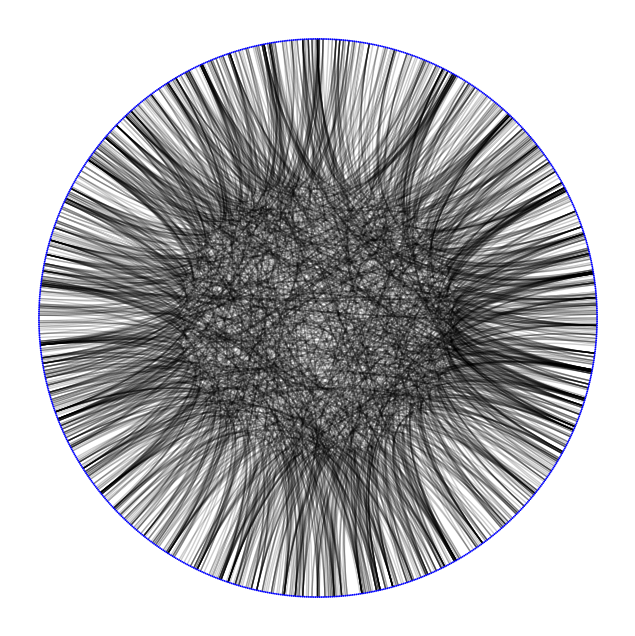

In [8]:
# Ler apenas as colunas necessárias do CSV
df = pd.read_csv('medicamentos.csv',
                 encoding='Windows-1252',
                 delimiter=';',
                 usecols=['NOME_PRODUTO', 'CATEGORIA_REGULATORIA', 'PRINCIPIO_ATIVO'])

# Filtrar os medicamentos onde PRINCIPIO_ATIVO não é nulo ou vazio
df_filtrado = df.dropna(subset=['PRINCIPIO_ATIVO'])

df_amostra = df_filtrado.sample(n=1000, random_state=1)
# Criar um grafo vazio
graph = nx.Graph()

# Criar um dicionário para mapear princípios ativos aos medicamentos
principio_ativo_medicamentos = {}

# Preencher o dicionário separando os princípios ativos e mapeando para medicamentos
for idx, row in df_amostra.iterrows():
    principios = [p.strip() for p in row['PRINCIPIO_ATIVO'].split('+')]  # Separar os princípios ativos
    medicamento = row['NOME_PRODUTO']
    categoria_regulatoria = row['CATEGORIA_REGULATORIA']

    # Adicionar nós com atributo de categoria regulatória
    graph.add_node(medicamento, categoria=categoria_regulatoria)

    for principio in principios:
        if principio not in principio_ativo_medicamentos:
            principio_ativo_medicamentos[principio] = []
        principio_ativo_medicamentos[principio].append(medicamento)

# Criar arestas entre medicamentos que compartilham princípios ativos
for medicamentos in principio_ativo_medicamentos.values():
    if len(medicamentos) > 1:
        for i, medicamento1 in enumerate(medicamentos):
            for medicamento2 in medicamentos[i + 1:]:
                graph.add_edge(medicamento1, medicamento2)

# Calcular a assortatividade com base na categoria regulatória
assortativity = nx.attribute_assortativity_coefficient(graph, 'categoria')

print(f"Assortativity based on Regulatory Category: {assortativity}")
# Desenhar o grafo utilizando o CircosPlot
plt.figure(figsize=(10, 8))
c = circos(graph)
plt.show()


#### Conclusion

When calculating the assortativity of the complete graph of the medicines network from the federal government database by ANVISA based on regulatory category, while considering only medications with a valid or active registration status, we obtained the value **assortativity = 0.36022898461592506**.

Although this is not a very high value, considering that assortativity can range from 0 to 1, this graph demonstrates a certain tendency to share more active ingredients among medications within the same regulatory category. The presence of thousands of medications, and consequently thousands of nodes in the graph, reinforces this observation. This finding suggests that regulatory frameworks may influence the formulation and distribution of medications, potentially guiding prescribers in selecting therapeutic options that share similar active components. Understanding the dynamics of such relationships can provide valuable insights for regulatory authorities and pharmaceutical stakeholders, helping to optimize medication management practices and enhance patient safety.